In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities = []
# Identigy the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [6]:
# import the requests library
import requests

# import the weather_api_key
from config import weather_api_key

# build basic URL for the OpenWeatherMap with weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# import the datetime module from the datetime library
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | mahebourg
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | quibdo
Processing Record 5 of Set 1 | sangar
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | henties bay
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | aykhal
Processing Record 16 of Set 1 | hovd
Processing Record 17 of Set 1 | cidreira
Processing Record 18 of Set 1 | borgarnes
Processing Record 19 of Set 1 | katsuura
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | monrovia
Processing Record 22 of Set 1 | li

Processing Record 36 of Set 4 | whitehorse
Processing Record 37 of Set 4 | tres lagoas
Processing Record 38 of Set 4 | copiapo
Processing Record 39 of Set 4 | broken hill
Processing Record 40 of Set 4 | cacheu
Processing Record 41 of Set 4 | leningradskiy
Processing Record 42 of Set 4 | chumikan
Processing Record 43 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 44 of Set 4 | arraial do cabo
Processing Record 45 of Set 4 | manzanillo
Processing Record 46 of Set 4 | burgeo
Processing Record 47 of Set 4 | vastervik
City not found. Skipping...
Processing Record 48 of Set 4 | nanortalik
Processing Record 49 of Set 4 | vila velha
Processing Record 50 of Set 4 | te anau
Processing Record 1 of Set 5 | bethel
Processing Record 2 of Set 5 | hofn
Processing Record 3 of Set 5 | young
Processing Record 4 of Set 5 | deder
Processing Record 5 of Set 5 | laizhou
Processing Record 6 of Set 5 | komsomolskiy
Processing Record 7 of Set 5 | severo-kurilsk
Processing Record 8 of Set

Processing Record 25 of Set 8 | ostersund
Processing Record 26 of Set 8 | ewa beach
Processing Record 27 of Set 8 | caravelas
Processing Record 28 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 29 of Set 8 | frontera
Processing Record 30 of Set 8 | burias
Processing Record 31 of Set 8 | sao filipe
Processing Record 32 of Set 8 | ngara
Processing Record 33 of Set 8 | balikpapan
Processing Record 34 of Set 8 | homer
Processing Record 35 of Set 8 | nishihara
Processing Record 36 of Set 8 | kidal
Processing Record 37 of Set 8 | moranbah
Processing Record 38 of Set 8 | biaora
Processing Record 39 of Set 8 | gizo
Processing Record 40 of Set 8 | kansanshi
Processing Record 41 of Set 8 | mamallapuram
Processing Record 42 of Set 8 | churapcha
Processing Record 43 of Set 8 | japura
Processing Record 44 of Set 8 | amga
Processing Record 45 of Set 8 | mikhaylovka
Processing Record 46 of Set 8 | qandala
Processing Record 47 of Set 8 | aberdeen
Processing Record 48 of Set 8 |

Processing Record 17 of Set 12 | salamiyah
Processing Record 18 of Set 12 | bukachacha
Processing Record 19 of Set 12 | kloulklubed
Processing Record 20 of Set 12 | batagay-alyta
Processing Record 21 of Set 12 | ulaanbaatar
Processing Record 22 of Set 12 | phuket
Processing Record 23 of Set 12 | berbera
Processing Record 24 of Set 12 | kununurra
Processing Record 25 of Set 12 | starodub
Processing Record 26 of Set 12 | sobolevo
Processing Record 27 of Set 12 | galle
Processing Record 28 of Set 12 | birur
Processing Record 29 of Set 12 | morwell
Processing Record 30 of Set 12 | umm kaddadah
Processing Record 31 of Set 12 | hualmay
Processing Record 32 of Set 12 | binga
Processing Record 33 of Set 12 | fairbanks
Processing Record 34 of Set 12 | praxedis guerrero
Processing Record 35 of Set 12 | touros
Processing Record 36 of Set 12 | raton
Processing Record 37 of Set 12 | knoxville
Processing Record 38 of Set 12 | gorno-chuyskiy
City not found. Skipping...
Processing Record 39 of Set 12 

In [8]:
len(city_data)

562

In [9]:
# convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,69.39,91,100,6.67,EC,2021-10-20 09:58:39
1,Mahebourg,-20.4081,57.7000,80.89,50,20,17.27,MU,2021-10-20 09:58:40
2,Hermanus,-34.4187,19.2345,82.90,46,65,9.80,ZA,2021-10-20 09:58:40
3,Quibdo,5.6947,-76.6611,72.48,99,99,1.70,CO,2021-10-20 09:58:40
4,Sangar,63.9242,127.4739,17.44,91,100,8.39,RU,2021-10-20 09:58:40
5,Bluff,-46.6000,168.3333,45.77,70,18,5.08,NZ,2021-10-20 09:58:41
6,Rikitea,-23.1203,-134.9692,74.48,67,0,18.21,PF,2021-10-20 09:58:41
7,Albany,42.6001,-73.9662,57.92,75,5,1.01,US,2021-10-20 09:58:41
8,Mataura,-46.1927,168.8643,37.60,96,3,1.25,NZ,2021-10-20 09:58:42
9,Henties Bay,-22.1160,14.2845,60.85,70,84,13.53,NA,2021-10-20 09:58:42


In [10]:
new_column_order = ["City","Country","Date","Lat","Lng", "Max Temp", "Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2021-10-20 09:58:39,-0.7393,-90.3518,69.39,91,100,6.67
1,Mahebourg,MU,2021-10-20 09:58:40,-20.4081,57.7000,80.89,50,20,17.27
2,Hermanus,ZA,2021-10-20 09:58:40,-34.4187,19.2345,82.90,46,65,9.80
3,Quibdo,CO,2021-10-20 09:58:40,5.6947,-76.6611,72.48,99,99,1.70
4,Sangar,RU,2021-10-20 09:58:40,63.9242,127.4739,17.44,91,100,8.39
5,Bluff,NZ,2021-10-20 09:58:41,-46.6000,168.3333,45.77,70,18,5.08
6,Rikitea,PF,2021-10-20 09:58:41,-23.1203,-134.9692,74.48,67,0,18.21
7,Albany,US,2021-10-20 09:58:41,42.6001,-73.9662,57.92,75,5,1.01
8,Mataura,NZ,2021-10-20 09:58:42,-46.1927,168.8643,37.60,96,3,1.25
9,Henties Bay,NA,2021-10-20 09:58:42,-22.1160,14.2845,60.85,70,84,13.53


In [11]:
# Creat the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields form the DataFrame plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

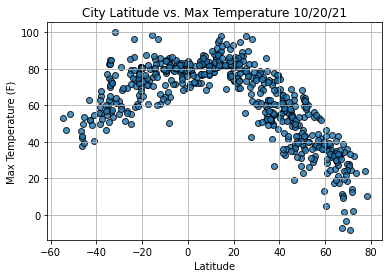

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs max temperature
plt.scatter(lats,
           max_temps,
           edgecolors="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show the plot
plt.show()

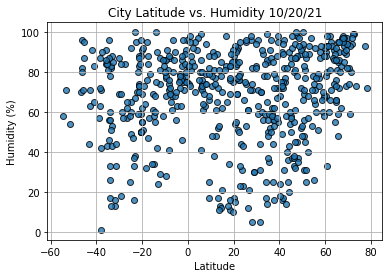

In [18]:
# Build the scatter plot for latitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolors="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show the plot
plt.show()

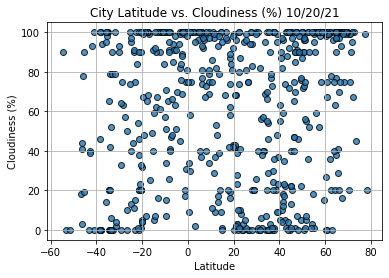

In [19]:
# Build the scatter plot for latitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolors="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show the plot
plt.show()

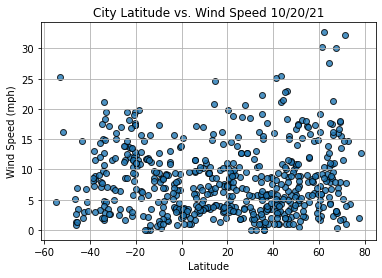

In [20]:
# Build the scatter plot for latitude vs wind speed
plt.scatter(lats,
           wind_speed,
           edgecolors="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show the plot
plt.show()